In [156]:
# ============= SET-UP =====================
# --- Standard library ---
import sys  # System pathing
from copy import deepcopy

# --- Scientific ---
import numpy as np  # General computational tools
from sklearn import metrics  # Measuring classifier performance
from scipy.special import comb

# --- Network science ---
import networkx as nx  # General network tools
from node2vec import Node2Vec as N2V  # Embedding tools

# --- Project source code ---
sys.path.append("../src/")
from Utils import *  # Custom synthetic benchmarks
from glee import eigenmaps

# --- Data handling and visualization ---
import matplotlib.pyplot as plt

# --- Miscellaneous ---
accuracy = metrics.accuracy_score
auroc = metrics.roc_auc_score

In [157]:
N = 100  # Number of active nodes in each layer, 1/2 total nodes!
dimensions = 128

# Form true layers
alpha = nx.complete_graph(N)
alpha.add_nodes_from(range(N, 2*N))

beta = nx.complete_graph(range(N, 2*N))
beta.add_nodes_from(range(N))

In [158]:
embedding = "n2v"

if embedding == "glee":
    E_alpha = eigenmaps(alpha, dimensions, method='glee', return_vals=False)
    E_beta = eigenmaps(beta, dimensions, method='glee', return_vals=False)
elif embedding == "n2v":
    E_alpha = N2V(alpha, dimensions=dimensions, walk_length=30, num_walks=200, workers=4, quiet=True).fit(window=10, min_count=1, batch_words=4).wv.vectors
    E_beta = N2V(beta, dimensions=dimensions, walk_length=30, num_walks=200, workers=4, quiet=True).fit(window=10, min_count=1, batch_words=4).wv.vectors

Text(0.5, 1.0, "'Big' Picture")

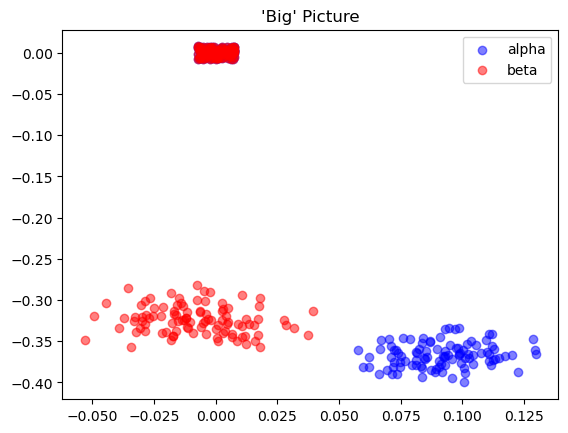

In [159]:
plt.figure()
plt.scatter(
    x=[v[0] for v in E_alpha],
    y=[v[1] for v in E_alpha],
    color="blue",
    label="alpha",
    alpha=0.5
)
plt.scatter(
    x=[v[0] for v in E_beta],
    y=[v[1] for v in E_beta],
    color="red",
    label="beta",
    alpha=0.5
)
plt.legend()
plt.title("'Big' Picture")

Text(0.5, 1.0, 'Second complete subgraph (beta)')

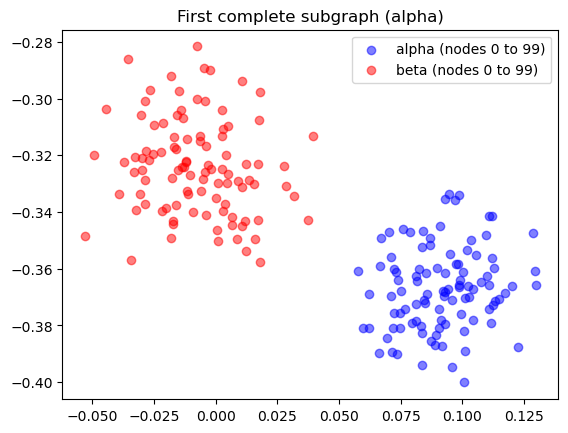

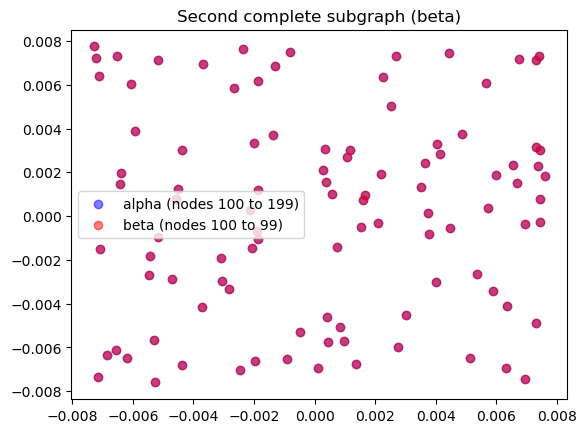

In [160]:
plt.figure()
plt.scatter(
    x=[v[0] for v in E_alpha[:N]],
    y=[v[1] for v in E_alpha[:N]],
    color="blue",
    label="alpha (nodes 0 to 99)",
    alpha=0.5
)
plt.scatter(
    x=[v[0] for v in E_beta[:N]],
    y=[v[1] for v in E_beta[:N]],
    color="red",
    label="beta (nodes 0 to 99)",
    alpha=0.5
)
plt.legend()

plt.title("First complete subgraph (alpha)")

# ----------------

plt.figure()
plt.scatter(
    x=[v[0] for v in E_alpha[N:]],
    y=[v[1] for v in E_alpha[N:]],
    color="blue",
    label="alpha (nodes 100 to 199)",
    alpha=0.5
)
plt.scatter(
    x=[v[0] for v in E_beta[N:]],
    y=[v[1] for v in E_beta[N:]],
    color="red",
    label="beta (nodes 100 to 99)",
    alpha=0.5
)
plt.legend()

plt.title("Second complete subgraph (beta)")

Text(0.5, 1.0, "Only nodes they 'should NOT' have active")

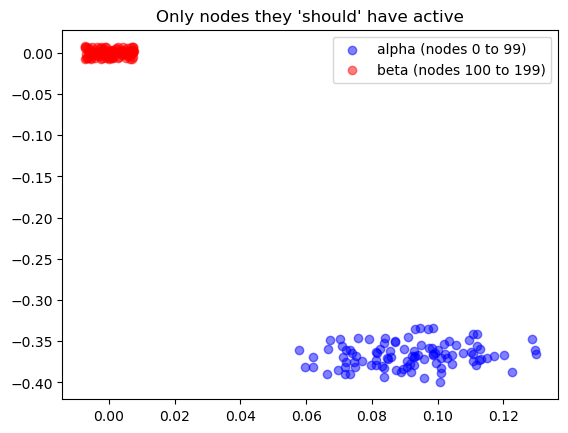

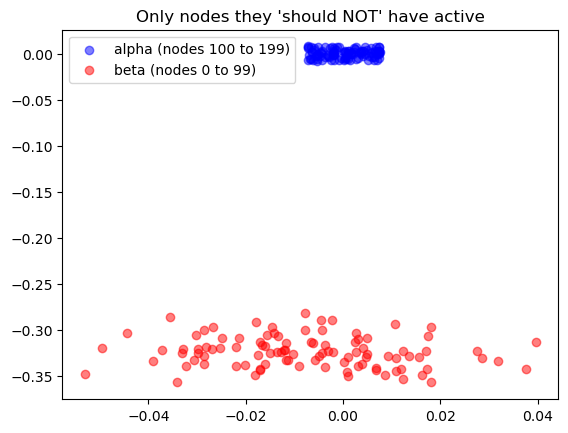

In [161]:
plt.figure()
plt.scatter(
    x=[v[0] for v in E_alpha[:N]],
    y=[v[1] for v in E_alpha[:N]],
    color="blue",
    label="alpha (nodes 0 to 99)",
    alpha=0.5
)
plt.scatter(
    x=[v[0] for v in E_beta[N:]],
    y=[v[1] for v in E_beta[N:]],
    color="red",
    label="beta (nodes 100 to 199)",
    alpha=0.5
)
plt.legend()

plt.title("Only nodes they 'should' have active")

# ----------------

plt.figure()
plt.scatter(
    x=[v[0] for v in E_alpha[N:]],
    y=[v[1] for v in E_alpha[N:]],
    color="blue",
    label="alpha (nodes 100 to 199)",
    alpha=0.5
)
plt.scatter(
    x=[v[0] for v in E_beta[:N]],
    y=[v[1] for v in E_beta[:N]],
    color="red",
    label="beta (nodes 0 to 99)",
    alpha=0.5
)
plt.legend()

plt.title("Only nodes they 'should NOT' have active")

Text(0.5, 1.0, 'Embedding coordinates of (37, 72)')

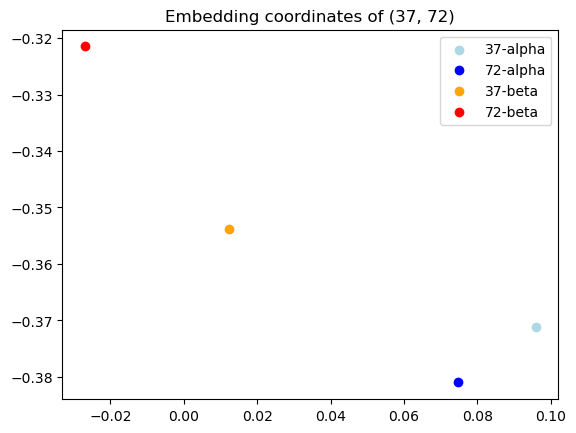

In [162]:
example = (37, 72)
_coords = 2

i, j = example
a_i, a_j = E_alpha[i], E_alpha[j]
b_i, b_j = E_beta[i], E_beta[j]


# -----
plt.figure()

# Alpha embedding
plt.scatter(
    x=[a_i[0]],
    y=[a_i[1]],
    color="lightblue",
    label=f"{i}-alpha",
)
plt.scatter(
    x=[a_j[0]],
    y=[a_j[1]],
    color="blue",
    label=f"{j}-alpha",
)

# Beta embedding
plt.scatter(
    x=[b_i[0]],
    y=[b_i[1]],
    color="orange",
    label=f"{i}-beta",
)
plt.scatter(
    x=[b_j[0]],
    y=[b_j[1]],
    color="red",
    label=f"{j}-beta",
)


plt.legend()
plt.title(f"Embedding coordinates of {example}")

In [163]:
print(f"Example edge: {example}")
print(f"{example} in alpha, beta: {example in alpha.edges()}, {example in beta.edges()}")
print("\n")

print(f"Norm of i-j in embeddings: {np.linalg.norm(a_i - a_j)}, {np.linalg.norm(b_i - b_j)}")
print("\n")

print(f"First {_coords} coordinates of indivual alpha vectors:\n {a_i[:_coords]}, {a_j[:_coords]}")
print(f"First {_coords} coordinates of indivual beta vectors:\n {b_i[:_coords]}, {b_j[:_coords]}")
print("---")
print(f"First {_coords} coordinates of alpha difference vector:\n {(a_i-a_j)[:_coords]}")
print(f"First {_coords} coordinates of beta difference vector:\n {(b_i-b_j)[:_coords]}")

Example edge: (37, 72)
(37, 72) in alpha, beta: True, False


Norm of i-j in embeddings: 0.20399488508701324, 0.3519143760204315


First 2 coordinates of indivual alpha vectors:
 [ 0.09589232 -0.37110552], [ 0.07476677 -0.3809798 ]
First 2 coordinates of indivual beta vectors:
 [ 0.0122721  -0.35378456], [-0.02694337 -0.3214982 ]
---
First 2 coordinates of alpha difference vector:
 [0.02112555 0.00987428]
First 2 coordinates of beta difference vector:
 [ 0.03921546 -0.03228638]


In [164]:
deltas_alpha = {edge: None for edge in set(alpha.edges())}
deltas_beta = {edge: None for edge in set(beta.edges())}

for edge in deltas_alpha.keys():
    i, j = edge
    d_alpha = np.linalg.norm(E_alpha[i] - E_alpha[j])
    d_beta = np.linalg.norm(E_beta[i] - E_beta[j])
    deltas_alpha[edge] = (d_alpha, d_beta)

for edge in deltas_beta.keys():
    i, j = edge
    d_alpha = np.linalg.norm(E_alpha[i] - E_alpha[j])
    d_beta = np.linalg.norm(E_beta[i] - E_beta[j])
    deltas_beta[edge] = (d_alpha, d_beta)

deltas = deepcopy(deltas_alpha)
deltas.update(deltas_beta)

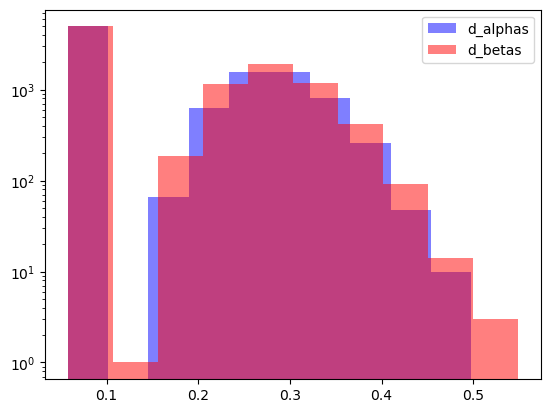

In [165]:
plt.figure()
plt.hist([x[0] for x in deltas.values()], color="blue", label="d_alphas", alpha=0.5)
plt.hist([x[1] for x in deltas.values()], color="red", label="d_betas", alpha=0.5)
plt.yscale("log")
plt.legend()

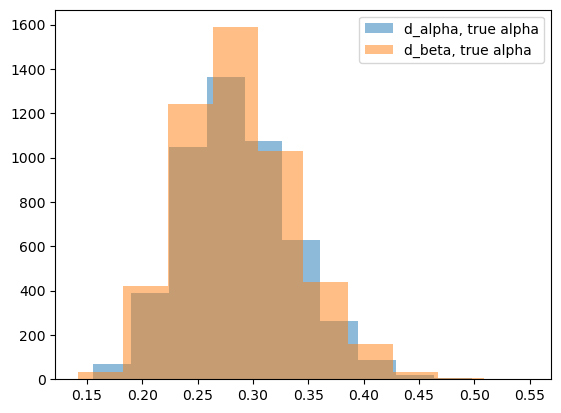

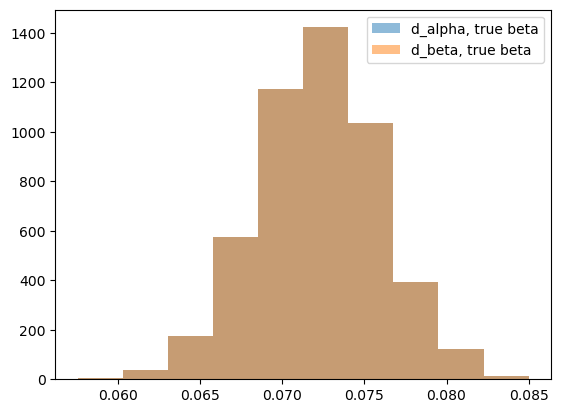

In [166]:
plt.figure()
plt.hist([x[0] for x in deltas_alpha.values()], label="d_alpha, true alpha", alpha=0.5)
plt.hist([x[1] for x in deltas_alpha.values()], label="d_beta, true alpha", alpha=0.5)
plt.legend()

plt.figure()
plt.hist([x[0] for x in deltas_beta.values()], label="d_alpha, true beta", alpha=0.5)
plt.hist([x[1] for x in deltas_beta.values()], label="d_beta, true beta", alpha=0.5)
plt.legend()

In [170]:
d_a = []
d_b = []


# Within 0 to 99, alpha stays same, beta goes to 100 + i
for edge in alpha.edges():
    i, j = edge
    i_ = i + 100
    j_ = j + 100
    _g = np.linalg.norm(E_alpha[i] - E_alpha[j])
    _h = np.linalg.norm(E_beta[i_] - E_beta[j_])
    d_a.append(_g <= _h or _h <= 1e-12)


# Within 100 to 199, alpha stays same, beta goes to 100 - i
for edge in beta.edges():
    i, j = edge
    i_ = i - 100
    j_ = j - 100
    _g = np.linalg.norm(E_alpha[i] - E_alpha[j])
    _h = np.linalg.norm(E_beta[i_] - E_beta[j_])
    d_b.append(_h <= _g or _g <= 1e-12)

print(sum(d_a) / len(d_a), sum(d_b) / len(d_b))

1.0 1.0
